# Imports

In [ ]:
!pip install langdetect


import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for data visualization
import re  # Import the regular expression library
import nltk  # Import the NLTK library
from nltk.corpus import stopwords # Import stopwords from NLTK
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Import CountVectorizer and TfidfVectorizer
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import accuracy_score, confusion_matrix, and classification_report
from wordcloud import WordCloud  # Import the WordCloud class
from collections import Counter  # Import the Counter class
nltk.download('stopwords')  # Download the stopwords
from google.colab import drive  # Import the drive module
import os  # Import the os module
from tqdm import tqdm  # Import tqdm for progress bar
tqdm.pandas()  # Initialize tqdm for pandas
from textblob import TextBlob  # Import TextBlob for sentiment analysis
from langdetect import detect  # Import detect function from langdetect
from nltk.tokenize import word_tokenize  # Import word_tokenize from NLTK
from os.path import exists  # Import exists function from os module
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=e15ad3d379c61ffc71dcd05dc5aa99d698983fd66529b5d1697dc24a4c1107c8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define the directory path
file_path_workseet_df = '/content/drive/MyDrive/NLP_project/workseet_df.csv'

if os.path.exists(file_path_workseet_df):
    df_raw_data = pd.read_csv(file_path_workseet_df)
    print(f'File read from {file_path_workseet_df}')
else:
    # Step 1: Install the Kaggle package
    !pip install kaggle

    # Step 2: Set up Kaggle API credentials
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

    # Step 3: Download the dataset from Kaggle
    !kaggle datasets download -d naserabdullahalam/phishing-email-dataset

    # Step 4: Unzip the dataset into the NLP_project directory
    !unzip phishing-email-dataset.zip -d /content/drive/MyDrive/NLP_project/phishing_data

    # Define the directory path
    directory_path = '/content/drive/MyDrive/NLP_project/phishing_data/'
    files_df_dict = {}

    # Iterate through the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv') and filename != 'phishing_email.csv':
            print(f'Processing: {filename}')
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path)

            # Convert date column to datetime if it exists
            if 'date' in df.columns:
                df['date'] = pd.to_datetime(df['date'],format='mixed')

            files_df_dict[filename.split('.')[0]] = df

    df_raw_data = pd.concat(files_df_dict.values(), ignore_index=True)

    # Ensure the date column is in datetime format after concatenation
    if 'date' in df_raw_data.columns:
        df_raw_data['date'] = pd.to_datetime(df_raw_data['date'], errors='coerce')

    # Define the file path in the NLP_project directory
    file_path = '/content/drive/MyDrive/NLP_project/workseet_df.csv'

    # Save the DataFrame as a CSV file
    df_raw_data.to_csv(file_path, index=False)

    print(f'File saved to {file_path}')


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset
License(s): CC-BY-SA-4.0
100% 77.0M/77.1M [00:05<00:00, 16.6MB/s]
100% 77.1M/77.1M [00:05<00:00, 14.1MB/s]
Archive:  phishing-email-dataset.zip
replace /content/drive/MyDrive/NLP_project/phishing_data/CEAS_08.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Processing: CEAS_08.csv


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_raw_data.head()

In [ ]:
# Check the number of null values in the 'standardized_dates' column
df_raw_data['standardized_dates'] = pd.to_datetime(df_raw_data['date'], errors='coerce')

# Define the fill value
fill_value = pd.to_datetime('1900-01-01 00:00:00 -0000')

# Fill NaN values with the fill value
df_raw_data['standardized_dates'] = df_raw_data['standardized_dates'].fillna(fill_value)

df_raw_data['standardized_dates'] = pd.to_datetime(df_raw_data['standardized_dates'], errors='coerce')

# Verify if the column is already timezone-aware
print(df_raw_data['standardized_dates'].apply(lambda x: x.tzinfo))

# If already timezone-aware, convert to desired timezone (e.g., 'UTC')
if df_raw_data['standardized_dates'].apply(lambda x: x.tzinfo).notna().any():
    df_raw_data['standardized_dates'] = df_raw_data['standardized_dates'].dt.tz_convert('UTC')
else:
    # Otherwise, localize to 'UTC'
    df_raw_data['standardized_dates'] = df_raw_data['standardized_dates'].dt.tz_localize('UTC', ambiguous='NaT')

# Check for any remaining null values
num_nulls = df_raw_data['standardized_dates'].isna().sum()
print(f"Number of null values: {num_nulls}")

print(df_raw_data)
df_raw_data.info()


<ipython-input-75-f2f91e5ee060>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_raw_data['standardized_dates'] = pd.to_datetime(df_raw_data['date'], errors='coerce')


0        UTC-07:00
1             None
2             None
3             None
4             None
           ...    
82481         None
82482         None
82483         None
82484         None
82485         None
Name: standardized_dates, Length: 82486, dtype: object
Number of null values: 78695
                                                  sender  \
0                       Young Esposito <Young@iworld.de>   
1                           Mok <ipline's1983@icable.ph>   
2      Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                     Michael Parker <ivqrnai@pobox.com>   
4      Gretchen Suggs <externalsep1@loanofficertool.com>   
...                                                  ...   
82481  Professional_Career_Development_Institute@Frug...   
82482                          "IQ - TBA" <tba@insiq.us>   
82483                               Mike <raye@yahoo.lv>   
82484                   "Mr. Clean" <cweqx@dialix.oz.au>   
82485  "wilsonkamela400@netscape.net" <wilsonka

In [ ]:

# # Download necessary NLTK data files
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# # Initialize tqdm for pandas
# tqdm.pandas()

# def clean_text_and_extract_features(text):
#     # Handle potential non-string values
#     if not isinstance(text, str):
#         return '', [], [], [], [], 0, 0.0, [], [], '', [], []  # Return empty if not a string

#     # Convert text to lowercase
#     text = text.lower()

#     # Initialize lists to store extracted features
#     urls_extracted = []
#     emails_extracted = []
#     phone_numbers_extracted = []
#     dates_extracted = []
#     hashtags_extracted = []
#     mentions_extracted = []
#     named_entities = []

#     # Replace emails with _email_ and collect extracted emails
#     def replace_email(match):
#         emails_extracted.append(match.group())
#         return '_email_'

#     text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', replace_email, text)

#     # Replace URLs with _url_ and collect extracted URLs
#     def replace_url(match):
#         urls_extracted.append(match.group())
#         return '_url_'

#     text = re.sub(r'http\S+', replace_url, text)

#     # Extract phone numbers
#     phone_numbers_extracted = re.findall(r'\b\d{10}\b', text)  # This is a simple regex for 10-digit numbers

#     # Extract dates (simple regex for common date formats)
#     dates_extracted = re.findall(r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b', text)

#     # Extract hashtags
#     hashtags_extracted = re.findall(r'#\w+', text)

#     # Extract mentions
#     mentions_extracted = re.findall(r'@\w+', text)

#     # Remove digits
#     text = re.sub(r'\d+', '', text)

#     # Remove non-word characters (excluding spaces)
#     text = re.sub(r'[^\w\s]', '', text)

#     # Remove words with length less than or equal to 1
#     text = re.sub(r'\b\w{1}\b', '', text)

#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     text = ' '.join([word for word in text.split() if word not in stop_words])

#     # Compute word count
#     word_count = len(text.split())

#     # Compute sentiment score
#     sentiment_score = TextBlob(text).sentiment.polarity

#     # Detect language
#     try:
#         language = detect(text)
#     except:
#         language = 'unknown'

#     # Perform POS tagging
#     tokens = word_tokenize(text)
#     pos_tags = nltk.pos_tag(tokens)

#     # Perform Named Entity Recognition (NER)
#     chunks = nltk.ne_chunk(pos_tags, binary=True)
#     for chunk in chunks:
#         if hasattr(chunk, 'label'):
#             named_entities.append(' '.join(c[0] for c in chunk))

#     return text, urls_extracted, emails_extracted, phone_numbers_extracted, dates_extracted, word_count, sentiment_score, hashtags_extracted, mentions_extracted, language, pos_tags, named_entities

# # Read the raw data from /content/drive/MyDrive/NLP_project/workseet_df.csv
# raw_data_path = '/content/drive/MyDrive/NLP_project/workseet_df.csv'
# df_raw_data = pd.read_csv(raw_data_path)

# # Define the file path for cleaned data
# file_path_cleand_workseet_df = '//content/drive/MyDrive/NLP_project/cleand_workseet_df.csv'

# if exists(file_path_cleand_workseet_df):
#     print(f"File {file_path_cleand_workseet_df} exists")
#     df_raw_data = pd.read_csv(file_path_cleand_workseet_df)
# else:
#     # Progressively clean each email body and extract features
#     cleaned_data = df_raw_data['body'].progress_apply(clean_text_and_extract_features)

#     # Separate the results into different columns
#     df_raw_data['clean_text'] = cleaned_data.apply(lambda x: x[0])
#     df_raw_data['urls_in_body'] = cleaned_data.apply(lambda x: x[1])
#     df_raw_data['emails_in_body'] = cleaned_data.apply(lambda x: x[2])
#     df_raw_data['phone_numbers_in_body'] = cleaned_data.apply(lambda x: x[3])
#     df_raw_data['dates_in_body'] = cleaned_data.apply(lambda x: x[4])
#     df_raw_data['word_count'] = cleaned_data.apply(lambda x: x[5])
#     df_raw_data['sentiment_score'] = cleaned_data.apply(lambda x: x[6])
#     df_raw_data['hashtags_in_body'] = cleaned_data.apply(lambda x: x[7])
#     df_raw_data['mentions_in_body'] = cleaned_data.apply(lambda x: x[8])
#     df_raw_data['language'] = cleaned_data.apply(lambda x: x[9])
#     df_raw_data['pos_tags'] = cleaned_data.apply(lambda x: x[10])
#     df_raw_data['named_entities'] = cleaned_data.apply(lambda x: x[11])

#     # Display the first few rows of the DataFrame to check the cleaned text and extracted features
#     df_raw_data[['body', 'clean_text', 'urls_in_body', 'emails_in_body', 'phone_numbers_in_body', 'dates_in_body', 'word_count', 'sentiment_score', 'hashtags_in_body', 'mentions_in_body', 'language', 'pos_tags', 'named_entities']].head()

#     # Save the DataFrame to the specified path in Google Drive
#     df_raw_data.to_csv(file_path_cleand_workseet_df, index=False)

#     print(f'File saved to {file_path_cleand_workseet_df}')
# file_path_cleand_workseet_df = '/content/drive/MyDrive/NLP_project/cleaned_workseet_df.csv'
# df = pd.read_csv(file_path_cleaned_workseet_df)


In [ ]:
file_path_cleand_workseet_df = '/content/drive/MyDrive/NLP_project/cleaned_workseet_df.csv'
df = pd.read_csv(file_path_cleand_workseet_df)


In [ ]:
df.head()

,sender,receiver,date,subject,body,label,urls,clean_text,urls_in_body,emails_in_body,phone_numbers_in_body,dates_in_body,word_count,sentiment_score,hashtags_in_body,mentions_in_body,language,pos_tags,named_entities
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,buck troubles caused small dimension soon beco...,['http://whitedone.com/'],[],[],[],22,0.125000,[],[],en,"[('buck', 'NN'), ('troubles', 'NNS'), ('caused...",[]
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,upgrade sex pleasures techniques _url_,['http://www.brightmade.com'],[],[],[],5,0.000000,[],[],fr,"[('upgrade', 'JJ'), ('sex', 'NN'), ('pleasures...",[]
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,daily top cnncom top videos stories aug pm edt...,['http://www.cnn.com/video/partners/email/inde...,['c202f8eb239faf8d4b0a5c6a41cde453@gvc.ceas-ch...,[],[],182,0.219231,[],[],en,"[('daily', 'JJ'), ('top', 'JJ'), ('cnncom', 'N...",[]
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,would anyone object removing list tld basicall...,['http://en.wikipedia.org/wiki/.so_%28domain_n...,['wrzzpv@apache.org'],['2008020601'],[],1650,0.037354,[],[],ca,"[('would', 'MD'), ('anyone', 'NN'), ('object',...",[]
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,welcomefastshippingcustomersupport _url_,['http://7iwfna.blu.livefilestore.com/y1pxdx3k...,[],[],[],2,0.000000,[],[],en,"[('welcomefastshippingcustomersupport', 'NN'),...",[]


In [ ]:
# Function to check for specific patterns in a column
def check_patterns(column):
    not_null = column.notnull()
    contains_angle_brackets = column.str.contains(r'<.*>', regex=True, na=False)
    contains_at_symbol = column.str.contains('@', na=False)

    # Count occurrences
    total_not_null = not_null.sum()
    with_angle_brackets = contains_angle_brackets.sum()
    with_at_symbol = contains_at_symbol.sum()
    without_angle_brackets_and_at_symbol = total_not_null - with_angle_brackets - with_at_symbol

    return with_angle_brackets, with_at_symbol, without_angle_brackets_and_at_symbol

# Apply function to both columns
sender_results = check_patterns(df['sender'])
receiver_results = check_patterns(df['receiver'])

# Display results
print("Sender column:")
print(f"With angle brackets: {sender_results[0]}")
print(f"With '@' symbol: {sender_results[1]}")


print("\nReceiver column:")
print(f"With angle brackets: {receiver_results[0]}")
print(f"With '@' symbol: {receiver_results[1]}")


In [ ]:
def extract_email(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        return text

    # Regular expression pattern to extract email
    email_pattern = r'(<)?([^<@]+@[^>]+)(?(1)>|)'

    # Search for the email pattern in the text
    match = re.search(email_pattern, text)

    # If a match is found, return the email address
    if match:
        return match.group(2)
    else:
        return text

# Apply the function to both columns and update the existing columns
df['sender'] = df['sender'].progress_apply(extract_email)
df['receiver'] = df['receiver'].progress_apply(extract_email)

# Function to check if a text contains '@'
def contains_at(text):
    return isinstance(text, str) and '@' in text

# Count how many rows are being dropped for each column
sender_dropped = df[~df['sender'].isnull() & ~df['sender'].apply(contains_at)].shape[0]
receiver_dropped = df[~df['receiver'].isnull() & ~df['receiver'].apply(contains_at)].shape[0]

# Set cells to null where sender or receiver do not contain '@'
df.loc[~df['sender'].apply(contains_at), 'sender'] = None
df.loc[~df['receiver'].apply(contains_at), 'receiver'] = None

# Display the DataFrame to check the updated columns
df.head()

100%|██████████| 82486/82486 [00:00<00:00, 115274.91it/s]


,sender,receiver,date,subject,body,label,urls,clean_text,urls_in_body,emails_in_body,phone_numbers_in_body,dates_in_body,word_count,sentiment_score,hashtags_in_body,mentions_in_body,language,pos_tags,named_entities
0,Young@iworld.de,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,buck troubles caused small dimension soon beco...,['http://whitedone.com/'],[],[],[],22,0.125000,[],[],en,"[('buck', 'NN'), ('troubles', 'NNS'), ('caused...",[]
1,ipline's1983@icable.ph,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,upgrade sex pleasures techniques _url_,['http://www.brightmade.com'],[],[],[],5,0.000000,[],[],fr,"[('upgrade', 'JJ'), ('sex', 'NN'), ('pleasures...",[]
2,Karmandeep-opengevl@universalnet.psi.br,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,daily top cnncom top videos stories aug pm edt...,['http://www.cnn.com/video/partners/email/inde...,['c202f8eb239faf8d4b0a5c6a41cde453@gvc.ceas-ch...,[],[],182,0.219231,[],[],en,"[('daily', 'JJ'), ('top', 'JJ'), ('cnncom', 'N...",[]
3,ivqrnai@pobox.com,xrh@spamassassin.apache.org,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,would anyone object removing list tld basicall...,['http://en.wikipedia.org/wiki/.so_%28domain_n...,['wrzzpv@apache.org'],['2008020601'],[],1650,0.037354,[],[],ca,"[('would', 'MD'), ('anyone', 'NN'), ('object',...",[]
4,externalsep1@loanofficertool.com,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,welcomefastshippingcustomersupport _url_,['http://7iwfna.blu.livefilestore.com/y1pxdx3k...,[],[],[],2,0.000000,[],[],en,"[('welcomefastshippingcustomersupport', 'NN'),...",[]


In [ ]:
print(f"Rows dropped from 'sender' column: {sender_dropped}")
print(f"Rows dropped from 'receiver' column: {receiver_dropped}")

Rows dropped from 'sender' column: 987
Rows dropped from 'receiver' column: 193


In [ ]:
import pandas as pd
from dateutil import parser
import re

# Define a function to clean the date string
def clean_date_string(date_str):
    # Remove any text within parentheses
    cleaned_str = re.sub(r'\(.*?\)', '', date_str)
    # Remove multiple question marks
    cleaned_str = re.sub(r'\?+', '', cleaned_str)
    # Remove non-ASCII characters
    cleaned_str = re.sub(r'[^\x00-\x7F]+', ' ', cleaned_str)
    # Replace common problematic characters
    cleaned_str = re.sub(r'[\x96\x97]', '-', cleaned_str)  # Replace en-dash and em-dash with hyphen
    # Handle specific time zones
    time_zones = {
        'Hora oficial do Brasil': 'BRT',
        'Jerusalem Standard Time': 'IST',
        'SE Asia Standard Time': 'SGT',
        'India Standard Time': 'IST',
        'Greenwich Standard Time': 'GMT',
        'Arabian Standard Time': 'AST',
        'Eastern Daylight Time': 'EDT',
        'GMT Daylight Time': 'GMT',
        'US Mountain Standard Time': 'MST',
        'US Central Standard Time': 'CST',
        'US Eastern Standard Time': 'EST',
        'US Pacific Standard Time': 'PST',
        'E. Europe Daylight Time': 'EET',
        'Westeurop?ische Normalzeit': 'CET',  # Central European Time
        'rodkowoeuropejski czas letni': 'CEST',  # Central European Summer Time
        'ora solare Europa occidentale': 'WEST',  # Western European Summer Time
        'Hora padr?o de GMT': 'GMT'
    }
    for tz, abbr in time_zones.items():
        cleaned_str = cleaned_str.replace(tz, abbr)
    # Remove leading and trailing whitespace
    cleaned_str = cleaned_str.strip()
    return cleaned_str


# Define a function to convert various date formats to a standard datetime format using dateutil.parser as a fallback
def convert_to_datetime(date):
    try:
        # Handle string 'nan' separately if necessary
        if isinstance(date, str) and date.strip().lower() == 'nan':  # Check if date is a string and equals 'nan'
            return pd.NaT, None
        if pd.isna(date):  # Handle other NaN types
            return pd.NaT, None
        # Clean the date string
        date_str = clean_date_string(str(date))
        # First try pandas' to_datetime
        dt = pd.to_datetime(date_str, errors='coerce', utc=True)
        if pd.isna(dt):
            # If pandas fails, try dateutil.parser
            dt = parser.parse(date_str)
        # Extract time zone if available
        tz_info = dt.tzinfo
        return dt, tz_info
    except Exception as e:
        print(f"Error converting date: {date}, Error: {e}")
        return pd.NaT, None

# Initialize dictionary for unique formats
unique_formats = {}

# Apply the conversion function to the 'dates' column and identify unique formats
standardized_dates = []
time_zones = []
for date in df['date']:
    dt, tz = convert_to_datetime(date)
    standardized_dates.append(dt)
    time_zones.append(tz)
    if pd.notna(dt):
        format_str = dt.strftime('%Y-%m-%d %H:%M:%S %Z')


# Add the standardized dates and time zones to the DataFrame
df['standardized_dates'] = standardized_dates
df['time-zone'] = time_zones

# Print the unique date formats and their
for format_str in unique_formats.items():
    print(f"Format: {format_str}")

Error converting date: Tue, 05 Aug   Hora oficial do Brasil, Error: Unknown string format: Tue, 05 Aug   BRT
Error converting date: Wed, 06 Aug   ?x?_????????, Error: Unknown string format: Wed, 06 Aug   x_
Error converting date: Wed, 06 Aug   Westeurop?ische Normalzeit, Error: Unknown string format: Wed, 06 Aug   Westeuropische Normalzeit
Error converting date: Wed, 06 Aug   K?z?p-eur?pai t?li id?, Error: Unknown string format: Wed, 06 Aug   Kzp-eurpai tli id
Error converting date: Wed, 06 Aug   ora solare Europa occidentale, Error: Unknown string format: Wed, 06 Aug   WEST
Error converting date: Wed, 06 Aug   Hora padr?o de GMT, Error: Unknown string format: Wed, 06 Aug   Hora padro de GMT
Error converting date: Thu, 07 Aug   Jerusalem Standard Time, Error: Unknown string format: Thu, 07 Aug   IST
Error converting date: Tue, 05 Aug   SE Asia Standard Time, Error: Unknown string format: Tue, 05 Aug   SGT
Error converting date: Thu, 07 Aug   E. Europe Daylight Time, Error: Unknown stri

<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Sun, 25 Aug 2002 16:50:54 UT" included an un-recognized timezone "UT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Mon, 26 Aug 2002 14:13:15 UT" included an un-recognized timezone "UT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Fri, 6 Sep 2002 08:44:38 EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead 

Error converting date: Sun, 25 Aug 2002 19:21:44 01800, Error: Unknown string format: Sun, 25 Aug 2002 19:21:44 01800
Error converting date: Thu, 29 Aug 2002 15:36:58 +-0500, Error: Unknown string format: Thu, 29 Aug 2002 15:36:58 +-0500
Error converting date: Fri, 30 Aug 2002 09:03:43 -0500 (added by, Error: Unknown string format: Fri, 30 Aug 2002 09:03:43 -0500 (added by


<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Fri, 30 Aug 02 21:48:08 EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Fri, 30 Aug 02 05:32:48 EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "2002/09/14 Sat 02:29:32 CDT" included an un-recognized timezone "CDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead p

Error converting date: Tue, 17 Sep 2002 11:59:30 +-0500, Error: Unknown string format: Tue, 17 Sep 2002 11:59:30 +-0500
Error converting date: Tue, 24 Sep 2002 10:39:13 +-0500, Error: Unknown string format: Tue, 24 Sep 2002 10:39:13 +-0500
Error converting date: Fri, 02 Aug 2002 23:37:59 0530, Error: Unknown string format: Fri, 02 Aug 2002 23:37:59 0530


<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Fri, 29 Jun 01 01:03:58 EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Sat, 13 Apr 02 18:49:02 AST" included an un-recognized timezone "AST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Tue, 23 Apr 2002 02:09:43 UT" included an un-recognized timezone "UT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead p

Error converting date: Sat, 8 Jun 2002 1:5:13 +-0500, Error: Unknown string format: Sat, 8 Jun 2002 1:5:13 +-0500
Error converting date: Mon, 10 Jun 2002 15:24:14 +-0500, Error: Unknown string format: Mon, 10 Jun 2002 15:24:14 +-0500
Error converting date: Thu, 18 Jul 2002 14:57:14 +-0800, Error: Unknown string format: Thu, 18 Jul 2002 14:57:14 +-0800


<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Sun, 21 Jul 2002 04:21:08 EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Sun, 21 Jul 2002 19:13:03 UT" included an un-recognized timezone "UT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Sun, 21 Jul 2002 16:46:01 EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Inste

Error converting date: Mon, 22 Jul 2002 0:4:52 +-0500, Error: Unknown string format: Mon, 22 Jul 2002 0:4:52 +-0500


<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Tue, 23 Jul 2002 14:34:01 EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Tue, 23 Jul 2002 22:11:25 UT" included an un-recognized timezone "UT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  dt = pd.to_datetime(date_str, errors='coerce', utc=True)
<ipython-input-82-a8f1d081257a>:53: FutureWarning: Parsed string "Wed, 24 Jul 2002 12:55:18 UT" included an un-recognized timezone "UT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead

Error converting date: Sat, 27 Jul 2002 18:53:31 +-0500, Error: Unknown string format: Sat, 27 Jul 2002 18:53:31 +-0500
Error converting date: Tue, 3 Dec 2002 11:51:12 +-0700, Error: Unknown string format: Tue, 3 Dec 2002 11:51:12 +-0700


In [ ]:


# # Function to check for specific patterns in a column
# def check_patterns(column):
#     not_null = column.notnull()
#     contains_angle_brackets = column.str.contains(r'<.*>', regex=True, na=False)
#     contains_at_symbol = column.str.contains('@', na=False)

#     # Count occurrences
#     total_not_null = not_null.sum()
#     with_angle_brackets = contains_angle_brackets.sum()
#     with_at_symbol = contains_at_symbol.sum()
#     without_angle_brackets_and_at_symbol = total_not_null - with_angle_brackets - with_at_symbol

#     return with_angle_brackets, with_at_symbol, without_angle_brackets_and_at_symbol

# # Apply function to both columns
# sender_results = check_patterns(df['sender'])
# receiver_results = check_patterns(df['receiver'])

# # Display results
# print("Sender column:")
# print(f"With angle brackets: {sender_results[0]}")
# print(f"With '@' symbol: {sender_results[1]}")


# print("\nReceiver column:")
# print(f"With angle brackets: {receiver_results[0]}")
# print(f"With '@' symbol: {receiver_results[1]}")



# exploration and visualization

## Sender

In [ ]:

non_null_senders = df['sender'].notnull().sum()

# Count senders containing '@'
senders_with_at = df['sender'].str.contains('@', na=False).sum()

# Total number of rows
total_rows = len(df)

print(f"Total rows in the DataFrame: {total_rows}")
print(f"Non-null senders: {non_null_senders}")
print(f"Senders containing '@': {senders_with_at}")
print(f"Null senders: {total_rows - non_null_senders}")
print(f"Non-null senders without '@': {non_null_senders - senders_with_at}")

# Percentage calculations
print(f"\nPercentage of non-null senders: {non_null_senders / total_rows * 100:.2f}%")
print(f"Percentage of senders containing '@': {senders_with_at / total_rows * 100:.2f}%")

Total rows in the DataFrame: 82486
Non-null senders: 48542
Senders containing '@': 48542
Null senders: 33944
Non-null senders without '@': 0

Percentage of non-null senders: 58.85%
Percentage of senders containing '@': 58.85%


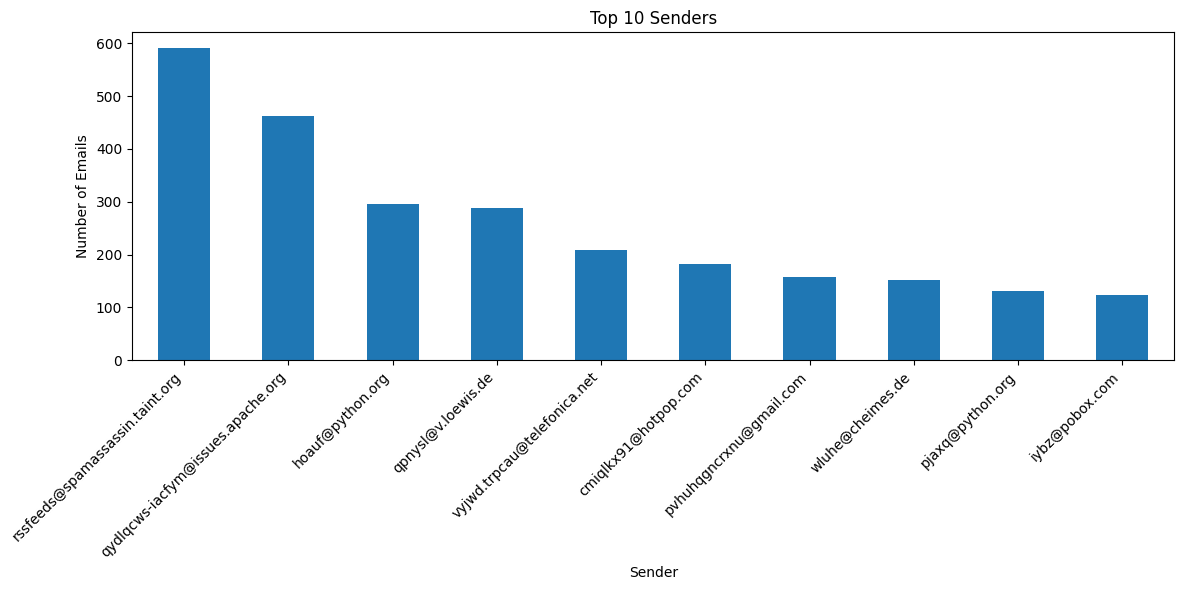

In [ ]:



# Get the distribution of senders
sender_distribution = df['sender'].value_counts()


plt.figure(figsize=(12, 6))
sender_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Senders')
plt.xlabel('Sender')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

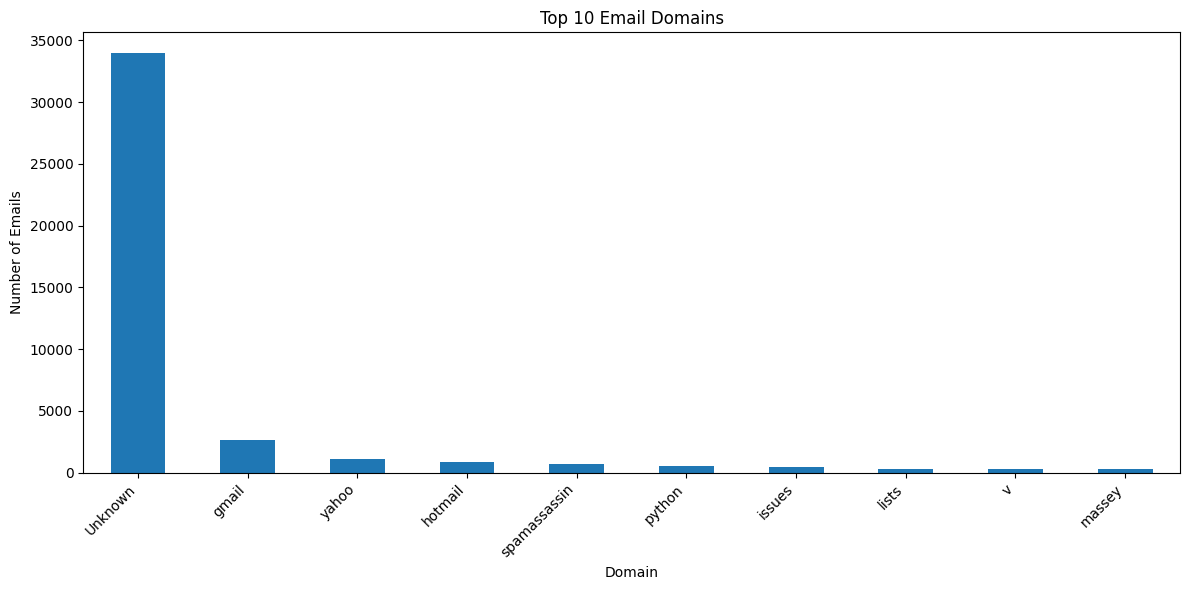

In [ ]:


def extract_domain(email):
    if isinstance(email, str): # Check if email is a string

        match = re.search(r'@([^.]+)', email)
        return match.group(1) if match else 'Unknown'
    else:
        return 'Unknown' # Handle non-string values

# Create a new column with just the domain
df['email_domain'] = df['sender'].apply(extract_domain)

# Get the distribution of email domains
domain_distribution = df['email_domain'].value_counts()


# Create a bar plot of the top 10 email domains
plt.figure(figsize=(12, 6))
domain_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Email Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



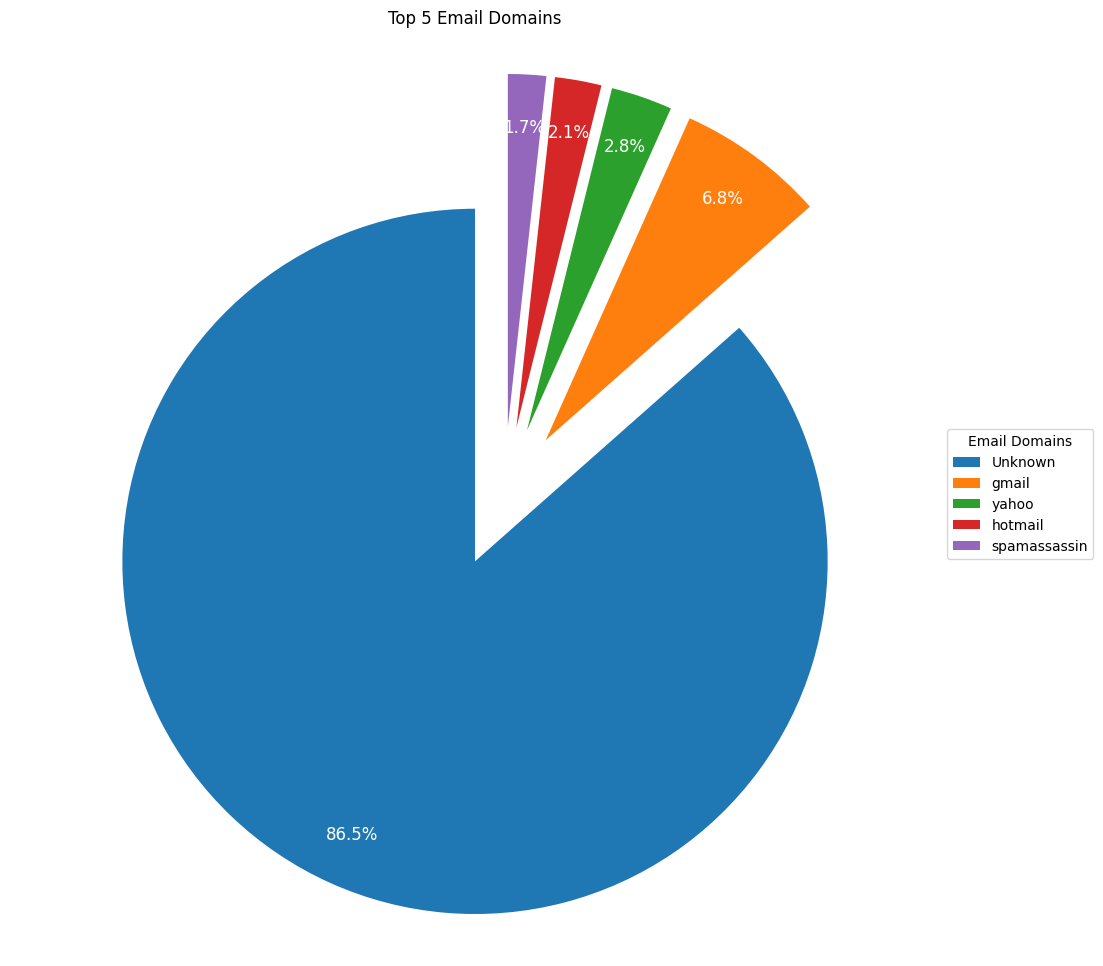

In [ ]:
plt.figure(figsize=(12, 12))  # Increase figure size for better readability
top_5_domains = domain_distribution.head()
explode = [0.2] * len(top_5_domains)  # Increase the explode value for better spacing

# Plot the pie chart
wedges, _, autotexts = plt.pie(
    top_5_domains,
    labels=['']*len(top_5_domains),  # Set empty labels
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    pctdistance=0.85  # Adjusting this value can help with label spacing as well
)

# Customize the autopct text
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Add a legend
plt.legend(wedges, top_5_domains.index, title="Email Domains", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Top 5 Email Domains')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## receiver

In [ ]:
non_null_receivers = df['receiver'].notnull().sum()

# Count receivers containing '@'
receivers_with_at = df['receiver'].str.contains('@', na=False).sum()

# Total number of rows
total_rows = len(df)

print(f"Total rows in the DataFrame: {total_rows}")
print(f"Non-null receivers: {non_null_receivers}")
print(f"Receivers containing '@': {receivers_with_at}")
print(f"Null receivers: {total_rows - non_null_receivers}")
print(f"Non-null receivers without '@': {non_null_receivers - receivers_with_at}")

# Percentage calculations
print(f"\nPercentage of non-null receivers: {non_null_receivers / total_rows * 100:.2f}%")
print(f"Percentage of receivers containing '@': {receivers_with_at / total_rows * 100:.2f}%")


Total rows in the DataFrame: 82486
Non-null receivers: 47575
Receivers containing '@': 47575
Null receivers: 34911
Non-null receivers without '@': 0

Percentage of non-null receivers: 57.68%
Percentage of receivers containing '@': 57.68%


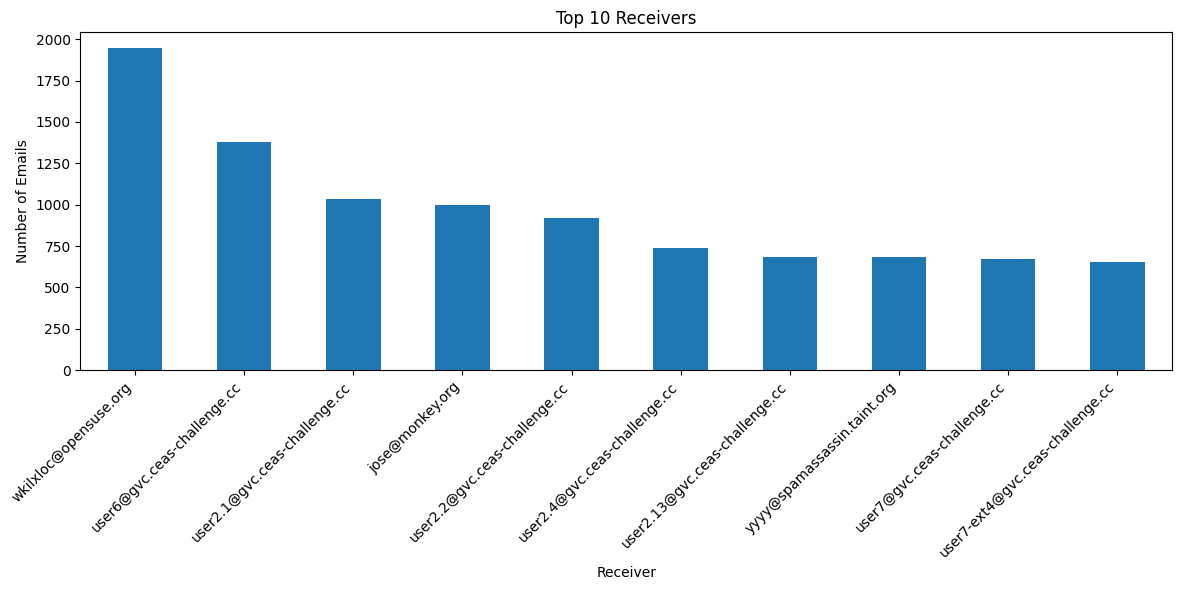

In [ ]:
# Get the distribution of receivers
receiver_distribution = df['receiver'].value_counts()

plt.figure(figsize=(12, 6))
receiver_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Receivers')
plt.xlabel('Receiver')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


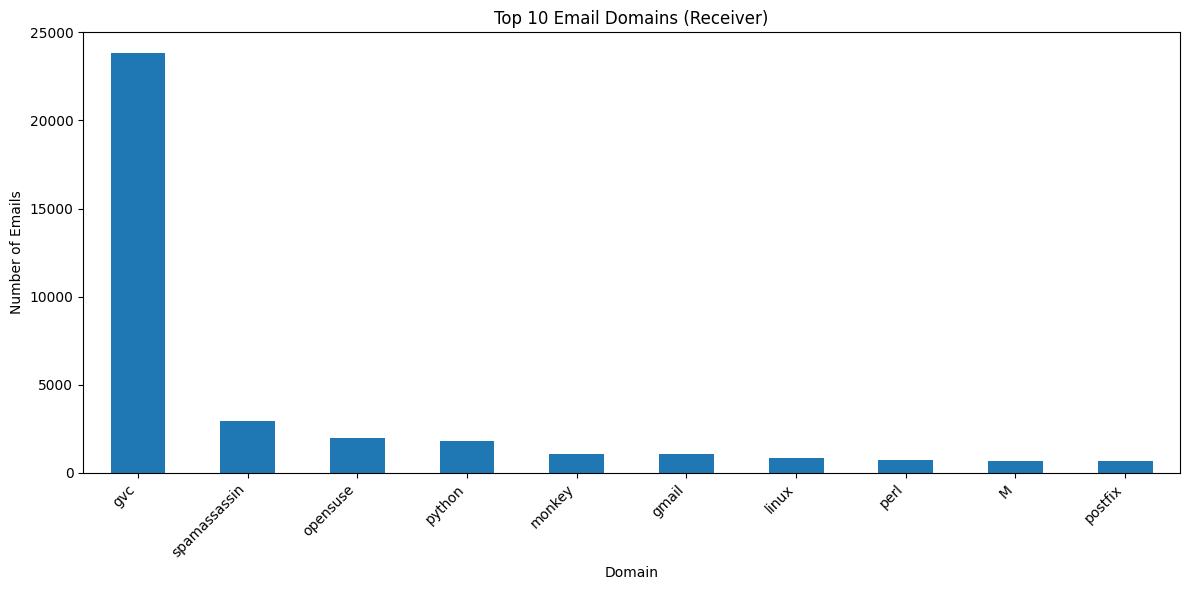

In [ ]:
def extract_domain(email):
    if isinstance(email, str):  # Check if email is a string
        match = re.search(r'@([^.]+)', email)
        return match.group(1) if match else 'Unknown'
    else:
        return 'Unknown'  # Handle non-string values

# Create a new column with just the domain
df['email_domain'] = df['receiver'].apply(extract_domain)

# Filter out 'Unknown' values
filtered_df = df[df['email_domain'] != 'Unknown']

# Get the distribution of email domains
domain_distribution = filtered_df['email_domain'].value_counts()

# Create a bar plot of the top 10 email domains
plt.figure(figsize=(12, 6))
domain_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Email Domains (Receiver)')
plt.xlabel('Domain')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


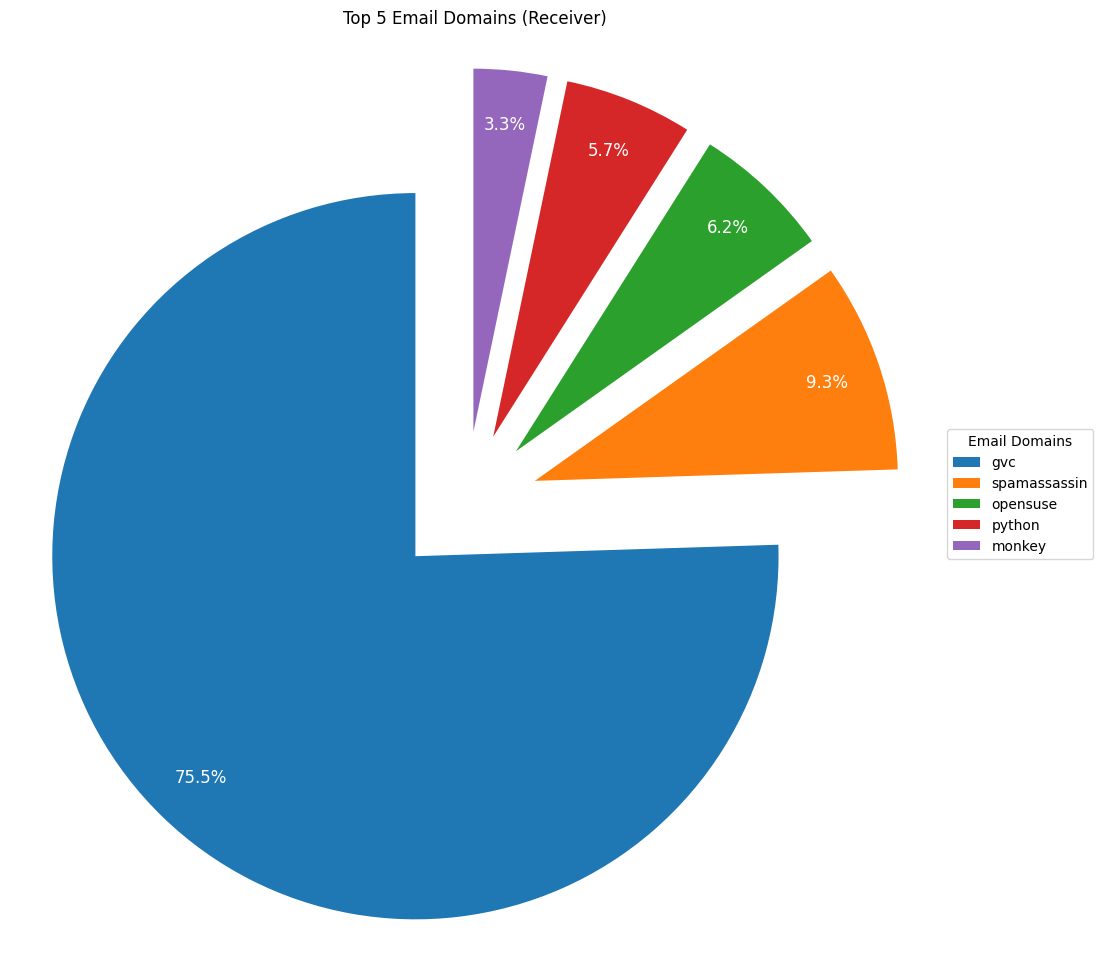

In [ ]:
plt.figure(figsize=(12, 12))  # Increase figure size for better readability
top_5_domains = domain_distribution.head()
explode = [0.2] * len(top_5_domains)  # Increase the explode value for better spacing

# Plot the pie chart
wedges, _, autotexts = plt.pie(
    top_5_domains,
    labels=['']*len(top_5_domains),  # Set empty labels
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    pctdistance=0.85  # Adjusting this value can help with label spacing as well
)

# Customize the autopct text
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Add a legend
plt.legend(wedges, top_5_domains.index, title="Email Domains", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Top 5 Email Domains (Receiver)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


## date

In [ ]:
# Function to get the type of each non-null entry
def check_type(entry):
    if pd.notnull(entry):
        return type(entry)
    return None

# Apply the function to the 'date' column
df['date_type'] = df['date'].apply(check_type)

# Display the types of non-null entries
non_null_types = df['date_type'].dropna().unique()
print(non_null_types)

[<class 'str'>]


In [ ]:
# Convert the 'date' column to datetime, forcing errors to NaT
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Display the DataFrame to check the updated 'date' column
print(df)

                                                  sender  \
0                                        Young@iworld.de   
1                                 ipline's1983@icable.ph   
2                Karmandeep-opengevl@universalnet.psi.br   
3                                      ivqrnai@pobox.com   
4                       externalsep1@loanofficertool.com   
...                                                  ...   
82481  Professional_Career_Development_Institute@Frug...   
82482                                       tba@insiq.us   
82483                                      raye@yahoo.lv   
82484                                 cweqx@dialix.oz.au   
82485  "wilsonkamela400@netscape.net" <wilsonkamela50...   

                                 receiver                       date  \
0             user4@gvc.ceas-challenge.cc  2008-08-05 16:31:02-07:00   
1           user2.2@gvc.ceas-challenge.cc  2008-08-05 18:31:03-05:00   
2           user2.9@gvc.ceas-challenge.cc  2008-08-05 20:28:00-

<ipython-input-93-1c434c29ba58>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
df['urls_in_body'].iloc[3]

"['http://en.wikipedia.org/wiki/.so_%28domain_name%29', 'http://svn.apache.org/viewvc?rev=619753&view=rev', 'http://svn.apache.org/viewvc/spamassassin/trunk/lib/mail/spamassassin/permsgstatus.pm?rev=619753&r1=619752&r2=619753&view=diff', 'https?:', 'http://svn.apache.org/viewvc/spamassassin/trunk/lib/mail/spamassassin/util/registrarboundaries.pm?rev=619753&r1=619752&r2=619753&view=diff', 'http://www.iana.org/cctld/cctld-whois.htm', 'http://www.iana.org/root-whois/', 'http://www.iana.org/gtld/gtld.htm', 'http://www.iana.org/arpa-dom/', 'http://data.iana.org/tld/tlds-alpha-by-domain.txt', 'http://svn.apache.org/viewvc/spamassassin/trunk/t/uri_text.t?rev=619753&r1=619752&r2=619753&view=diff', 'http://example.foo$', 'http://example.xxx$', 'http://example.ac$', 'http://example.ad$', 'http://example.ae$', 'http://example.aero$', 'http://example.af$', 'http://example.ag$', 'http://example.ai$', 'http://example.al$', 'http://example.am$', 'http://example.an$', 'http://example.ao$', 'http://exa

## Lables

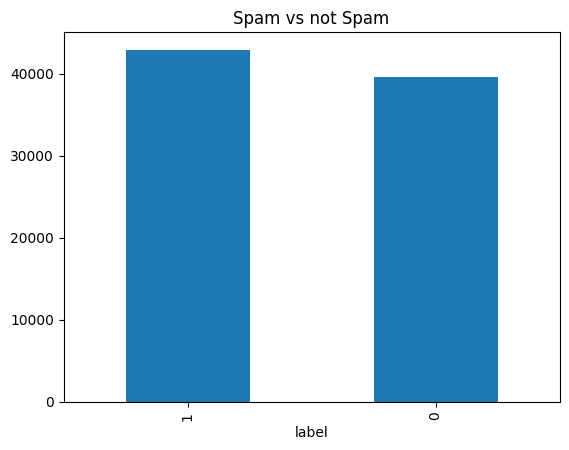

In [ ]:
df['label'].value_counts().plot(kind='bar', title='Spam vs not Spam')
plt.show()

## Urls

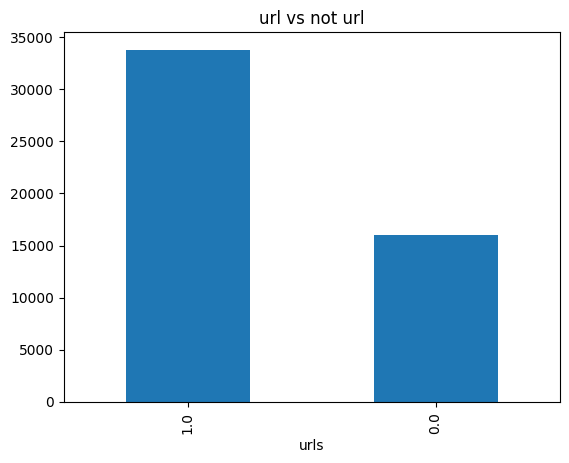

In [ ]:
df['urls'].value_counts().plot(kind='bar', title='url vs not url')
plt.show()

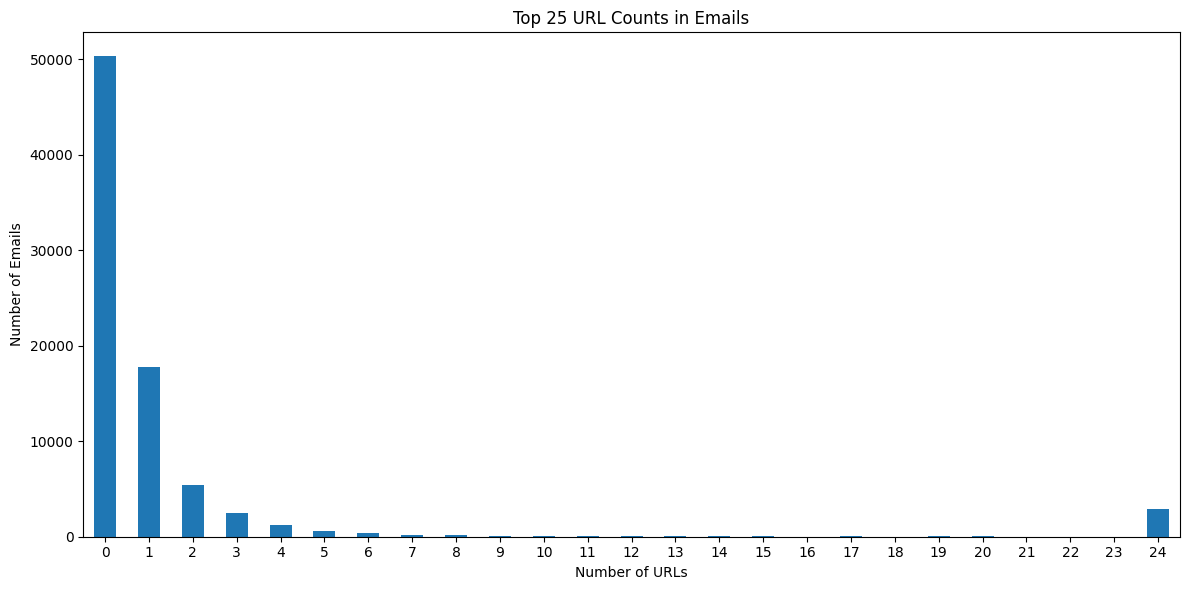

In [ ]:
import ast
def safe_eval_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    return []

# Convert string representations to actual lists
df['urls_in_body'] = df['urls_in_body'].apply(safe_eval_list)

# Flatten the lists and count the number of URLs in each
df['url_count'] = df['urls_in_body'].apply(len)

# Get the distribution of URL counts
url_count_distribution = df['url_count'].value_counts().sort_index()

# Get the top 25 most common URL counts including 0 if needed
top_25_url_counts = url_count_distribution.head(25)

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
top_25_url_counts.plot(kind='bar')
plt.title('Top 25 URL Counts in Emails')
plt.xlabel('Number of URLs')
plt.ylabel('Number of Emails')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Emails**

In [ ]:
df.head()

,sender,receiver,date,subject,body,label,urls,clean_text,urls_in_body,emails_in_body,...,hashtags_in_body,mentions_in_body,language,pos_tags,named_entities,standardized_dates,time-zone,email_domain,date_type,url_count
0,Young@iworld.de,user4@gvc.ceas-challenge.cc,2008-08-05 16:31:02-07:00,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,buck troubles caused small dimension soon beco...,[http://whitedone.com/],[],...,[],[],en,"[('buck', 'NN'), ('troubles', 'NNS'), ('caused...",[],2008-08-05 23:31:02+00:00,UTC,gvc,<class 'str'>,1
1,ipline's1983@icable.ph,user2.2@gvc.ceas-challenge.cc,2008-08-05 18:31:03-05:00,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,upgrade sex pleasures techniques _url_,[http://www.brightmade.com],[],...,[],[],fr,"[('upgrade', 'JJ'), ('sex', 'NN'), ('pleasures...",[],2008-08-05 23:31:03+00:00,UTC,gvc,<class 'str'>,1
2,Karmandeep-opengevl@universalnet.psi.br,user2.9@gvc.ceas-challenge.cc,2008-08-05 20:28:00-12:00,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,daily top cnncom top videos stories aug pm edt...,[http://www.cnn.com/video/partners/email/index...,['c202f8eb239faf8d4b0a5c6a41cde453@gvc.ceas-ch...,...,[],[],en,"[('daily', 'JJ'), ('top', 'JJ'), ('cnncom', 'N...",[],2008-08-06 08:28:00+00:00,UTC,gvc,<class 'str'>,24
3,ivqrnai@pobox.com,xrh@spamassassin.apache.org,2008-08-05 17:31:20-06:00,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,would anyone object removing list tld basicall...,[http://en.wikipedia.org/wiki/.so_%28domain_na...,['wrzzpv@apache.org'],...,[],[],ca,"[('would', 'MD'), ('anyone', 'NN'), ('object',...",[],2008-08-05 23:31:20+00:00,UTC,spamassassin,<class 'str'>,468
4,externalsep1@loanofficertool.com,user2.2@gvc.ceas-challenge.cc,2008-08-05 19:31:21-04:00,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,welcomefastshippingcustomersupport _url_,[http://7iwfna.blu.livefilestore.com/y1pxdx3kw...,[],...,[],[],en,"[('welcomefastshippingcustomersupport', 'NN'),...",[],2008-08-05 23:31:21+00:00,UTC,gvc,<class 'str'>,1


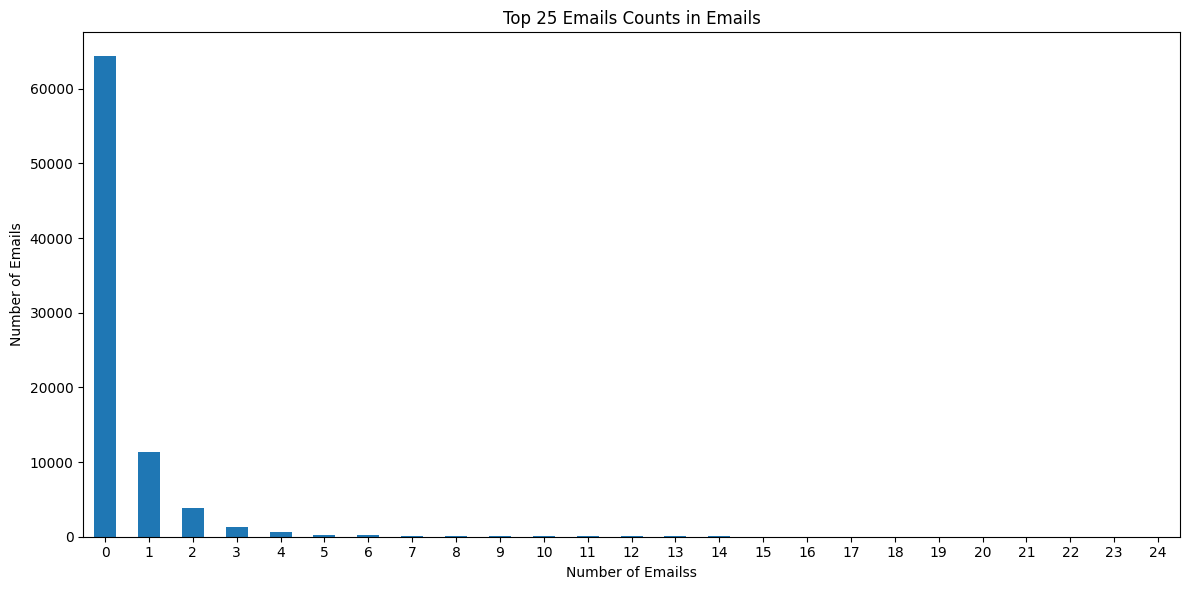

In [ ]:
import ast
def safe_eval_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    return []

# Convert string representations to actual lists
df['emails_in_body'] = df['emails_in_body'].apply(safe_eval_list)

# Flatten the lists and count the number of emails in each
df['emails_count'] = df['emails_in_body'].apply(len)

# Get the distribution of emails counts
url_count_distribution = df['emails_count'].value_counts().sort_index()

# Get the top 25 most common URL counts including 0 if needed
top_25_url_counts = url_count_distribution.head(25)

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
top_25_url_counts.plot(kind='bar')
plt.title('Top 25 Emails Counts in Emails')
plt.xlabel('Number of Emailss')
plt.ylabel('Number of Emails')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**hashtags**

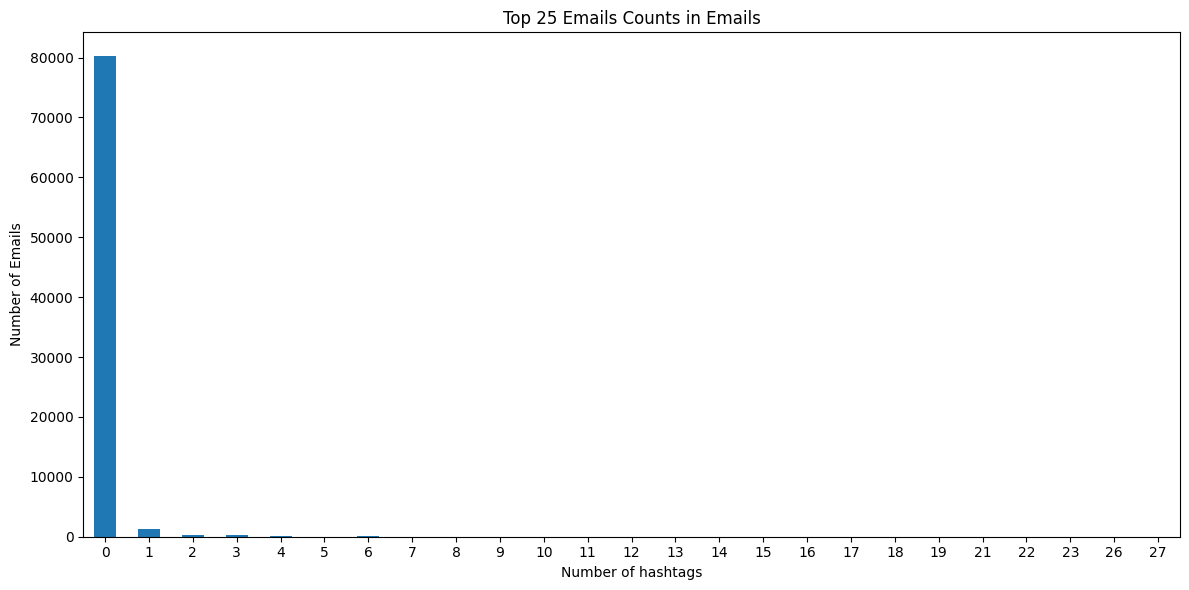

In [ ]:
import ast
def safe_eval_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    return []

# Convert string representations to actual lists
df['hashtags_in_body'] = df['hashtags_in_body'].apply(safe_eval_list)

# Flatten the lists and count the number of emails in each
df['hashtags_count'] = df['hashtags_in_body'].apply(len)

# Get the distribution of hashtags counts
url_count_distribution = df['hashtags_count'].value_counts().sort_index()

# Get the top 25 most common URL counts including 0 if needed
top_25_url_counts = url_count_distribution.head(25)

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
top_25_url_counts.plot(kind='bar')
plt.title('Top 25 Emails Counts in Emails')
plt.xlabel('Number of hashtags')
plt.ylabel('Number of Emails')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df_filtered = df[df['sender'].str.len() > 3]
# Filter rows with label 1
df_label_1 = df_filtered[df_filtered['label'] == 1]


# Get top 10 senders with the most occurrences of label 1
top_senders = df_label_1['sender'].value_counts().nlargest(10).index

# Filter the original DataFrame to include only the top senders
df_top_senders = df_filtered[df['sender'].isin(top_senders)]

# Group by 'sender' and 'label' to get counts
counts = df_top_senders.groupby(['sender', 'label']).size().unstack(fill_value=0)

# Plotting the histogram
counts.plot(kind='bar', stacked=True, color=['orange', 'blue'])

plt.xlabel('Sender')
plt.ylabel('Count')
plt.title('Top 10 Senders with Label 1 and Their Corresponding Label 0 Counts')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['0', '1'])

plt.show()


In [ ]:

# Filter the DataFrame by labels
df_label_1 = df[df['label'] == 1]
df_label_0 = df[df['label'] == 0]

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.hist(df_label_1['sentiment_score'], bins=50, alpha=0.3, color='red', label='spam')
plt.hist(df_label_0['sentiment_score'], bins=50, alpha=0.3, color='blue', label='not spam')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores by Label')
plt.legend()

plt.show()


In [ ]:

# Assuming df is your DataFrame
# Filter rows with label 1
df_label_1 = df[df['label'] == 1]

# Get top 10 senders with the most occurrences of label 1
top_senders = df_label_1['receiver'].value_counts().nlargest(10).index

# Filter the original DataFrame to include only the top senders
df_top_senders = df[df['receiver'].isin(top_senders)]

# Group by 'sender' and 'label' to get counts
counts = df_top_senders.groupby(['receiver', 'label']).size().unstack(fill_value=0)
# plt.figure(figsize=(6, 12))
# Plotting the histogram
counts.plot(kind='bar', stacked=True, color=['orange', 'blue'],figsize=(8, 5))

plt.xlabel('receiver')
plt.ylabel('Count')
plt.title('Top 10 receivers with Label 1 and Their Corresponding Label 0 Counts')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['not spam', 'spam'])

plt.show()
counts

In [ ]:
def extract_domain(email):
    if isinstance(email, str):  # Check if email is a string
        match = re.search(r'@([^.]+)', email)
        return match.group(1) if match else 'Unknown'
    else:
        return 'Unknown'  # Handle non-string values

# Create a new column with just the domain
df['email_domainr'] = df['receiver'].apply(extract_domain)
df['email_domains'] = df['sender'].apply(extract_domain)
# Filter out 'Unknown' values
filtered_df = df[df['email_domainr'] != 'Unknown']

filtered_df = df[df['email_domains'] != 'Unknown']


In [ ]:

# Assuming df is your DataFrame
# Filter rows with label 1
df_label_1 = filtered_df[filtered_df['label'] == 1]

# Get top 10 senders with the most occurrences of label 1
top_senders = df_label_1['email_domains'].value_counts().nlargest(10).index

# Filter the original DataFrame to include only the top senders
df_top_senders = df[df['email_domains'].isin(top_senders)]

# Group by 'sender' and 'label' to get counts
counts = df_top_senders.groupby(['email_domains', 'label']).size().unstack(fill_value=0)
# plt.figure(figsize=(6, 12))
# Plotting the histogram
counts.plot(kind='bar', stacked=True, color=['orange', 'blue'],figsize=(8, 5))

plt.xlabel('domain')
plt.ylabel('Count')
plt.title('Top 10 senders domain ')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['not spam', 'spam'])

plt.show()
counts

In [ ]:

# Assuming df is your DataFrame
# Filter rows with label 1
df_label_1 = filtered_df[(filtered_df['label'] == 1 )& (filtered_df['email_domainr']!='Unknown')]

# Get top 10 senders with the most occurrences of label 1
top_senders = df_label_1['email_domainr'].value_counts().nlargest(10).index

# Filter the original DataFrame to include only the top senders
df_top_senders = df[df['email_domainr'].isin(top_senders)]

# Group by 'sender' and 'label' to get counts
counts = df_top_senders.groupby(['email_domainr', 'label']).size().unstack(fill_value=0)
# plt.figure(figsize=(6, 12))
# Plotting the histogram
counts.plot(kind='bar', stacked=True, color=['orange', 'blue'],figsize=(8, 5))

plt.xlabel('domain')
plt.ylabel('Count')
plt.title('Top 10 recievers domain ')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['not spam', 'spam'])

plt.show()

In [ ]:
filtered_df = df[df['word_count'] <500]
# Filter the DataFrame by labels
df_label_1 = filtered_df[filtered_df['label'] == 1]
df_label_0 = filtered_df[filtered_df['label'] == 0]

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.hist(df_label_1['word_count'], bins=20, alpha=0.3, color='red', label='spam')
plt.hist(df_label_0['word_count'], bins=20, alpha=0.3, color='blue', label='not spam')

plt.xlabel('word_count')
plt.ylabel('Frequency')
plt.title('Histogram of word_count by Label')
plt.legend()

plt.show()

In [ ]:
from collections import Counter
import ast
# Filter DataFrame for rows where label is 1
df['pos_tags'] = list(df['pos_tags'])
df_label_1 = df[df['label'] == 1]
tokens = []
# Extract tokens from the 'pos_tags' column
# tokens = [token for sublist in df_label_1['pos_tags'] for token, pos in sublist if len(token)>1]
for i, row in df_label_1.iterrows():
    # print(row['pos_tags'].split('('))
    for tup in row['pos_tags'].split('('):
      if len(tup)>1:
        # print(tup.split(',')[0])
        tokens.append(tup.split(',')[0])


# Count the occurrences of each token
token_counts = Counter(tokens)

# Get the top 15 tokens
top_15_tokens = token_counts.most_common(15)

# Separate the tokens and their counts for plotting
labels, sizes = zip(*top_15_tokens)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# plt.title('Top 15 Tokens Appearing in Label 1')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()


In [ ]:
# Filter DataFrame for rows where label is 1
df['pos_tags'] = list(df['pos_tags'])
df_label_1 = df[df['label'] == 0]
tokens = []
# Extract tokens from the 'pos_tags' column
# tokens = [token for sublist in df_label_1['pos_tags'] for token, pos in sublist if len(token)>1]
for i, row in df_label_1.iterrows():
    # print(row['pos_tags'].split('('))
    for tup in row['pos_tags'].split('('):
      if len(tup)>1:
        # print(tup.split(',')[0])
        tokens.append(tup.split(',')[0])


# Count the occurrences of each token
token_counts = Counter(tokens)

# Get the top 15 tokens
top_15_tokens = token_counts.most_common(15)

# Separate the tokens and their counts for plotting
labels, sizes = zip(*top_15_tokens)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# plt.title('Top 15 Tokens Appearing in Label 1')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()


# Part B

# imports

In [ ]:

import os
import shutil
import time
import re
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.utils.prune as prune
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments


# **Models**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path = '/content/drive/MyDrive/trained_model'
model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(model_path)

In [ ]:


# Verify GPU availability
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

# Define text cleaner function
def text_cleaner(text):
    # Lowercase the text
    text = text.lower()

    # Replace URLs with _url_
    text = re.sub(r'https?://\S+|www\.\S+', '_url_', text)

    # Replace emails with _email_
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '_email_', text)

    # Remove special characters except ', ", _url_, and _email_
    text = re.sub(r"[^a-zA-Z0-9\s'\"_]", '', text)

    # Remove sequences of underscores that are not _url_ or _email_
    def clean_underscores(match):
        text = match.group(0)
        if text in ['_url_', '_email_']:
            return text
        return text.replace('_', '')

    text = re.sub(r'\b_[a-zA-Z0-9_]*_\b', clean_underscores, text)

    # Replace sequences of whitespace with a single space
    text = re.sub(r'\s+', ' ', text)

    # Strip leading and trailing whitespace
    text = text.strip()

    return text

# Load data
df = pd.read_csv('/content/drive/MyDrive/NLP_project/phishing_data/phishing_email.csv')
df.dropna(inplace=True)

# Clean the email texts
df['text_combined'] = df['text_combined'].apply(text_cleaner)

# Ensure labels are integers
df['label'] = df['label'].astype(int)

class EmailDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='pt'
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    device = 'cpu'
    model.to(device)
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            batch_predictions = torch.argmax(logits, dim=-1)
            predictions.extend(batch_predictions.cpu().numpy())

    return predictions
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text_combined'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)
train_dataset = EmailDataset(train_texts, train_labels, tokenizer, max_len=512)
val_dataset = EmailDataset(val_texts, val_labels, tokenizer, max_len=512)
data_set = EmailDataset(df['text_combined'].tolist(), df['label'].tolist(), tokenizer, max_len=512)
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)
def print_model_parameters(model):
    """
    Print the number of trainable parameters in the model.

    :param model: The model to evaluate.
    """
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params}")

def print_size_of_model(model):
    """
    Print the size of the model by saving it temporarily.

    :param model: The model to evaluate.
    """
    torch.save(model.state_dict(), "temp.pth")
    size = os.path.getsize("temp.pth") / (1024 ** 2)
    print(f"Model size: {size:.2f} MB")
    os.remove("temp.pth")



##**Roberta For Sequence Classification**

In [ ]:
#!pip install --upgrade numpy


In [ ]:
# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Define compute_metrics function to calculate accuracy
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# Create a PyTorch dataset
class EmailDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Split dataset with a fixed random seed
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text_combined'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)
train_dataset = EmailDataset(train_texts, train_labels, tokenizer, max_len=512)
val_dataset = EmailDataset(val_texts, val_labels, tokenizer, max_len=512)

# Check if a GPU is available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define training arguments with matching save and eval strategies
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,  # Increased batch size for efficiency
    per_device_eval_batch_size=16,
    warmup_steps=100,  # Reduced warmup steps
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,  # Log every 100 steps
    evaluation_strategy="epoch",  # Evaluate only at the end of each epoch
    save_strategy="epoch",  # Save model only at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    fp16=True,  # Enable mixed precision training for faster GPU training
)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
training_output = trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(f"Validation Loss: {results['eval_loss']}")
print(f"Validation Accuracy: {results['eval_accuracy'] * 100:.2f}%")

# Save the trained model and tokenizer after training completes
model.save_pretrained('/content/drive/MyDrive/NLP_project/trained_model')
tokenizer.save_pretrained('/content/drive/MyDrive/NLP_project/trained_model')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.154800,0.089579,0.976724
2,0.045100,0.064548,0.986908
3,0.038100,0.047741,0.989756


Validation Loss: 0.04774054139852524
Validation Accuracy: 98.98%


('/content/drive/MyDrive/NLP_project/trained_model/tokenizer_config.json',
 '/content/drive/MyDrive/NLP_project/trained_model/special_tokens_map.json',
 '/content/drive/MyDrive/NLP_project/trained_model/vocab.json',
 '/content/drive/MyDrive/NLP_project/trained_model/merges.txt',
 '/content/drive/MyDrive/NLP_project/trained_model/added_tokens.json')

In [ ]:
# Save the trained model's weights
model.save_pretrained('./trained_model')
# Optionally, save the tokenizer as well
tokenizer.save_pretrained('./trained_model')

('./trained_model/tokenizer_config.json',
 './trained_model/special_tokens_map.json',
 './trained_model/vocab.json',
 './trained_model/merges.txt',
 './trained_model/added_tokens.json')

## **Bert For Sequence Classification**

In [ ]:


# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define compute_metrics function to calculate accuracy
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# Create a PyTorch dataset
class EmailDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='pt'
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



# Create dataset and dataloader
dataset = EmailDataset(df['text_combined'].tolist(), df['label'].tolist(), tokenizer, max_len=512)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Check if a GPU is available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Move the model to the GPU if available
model.to(device)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
training_output = trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(f"Validation Loss: {results['eval_loss']}")
print(f"Validation Accuracy: {results['eval_accuracy'] * 100:.2f}%")
model.save_pretrained('/content/drive/MyDrive/NLP_project/trained_modelbert')
tokenizer.save_pretrained('/content/drive/MyDrive/NLP_project/trained_modelbert')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.077400,0.057358,0.988665


RuntimeError: [enforce fail at inline_container.cc:595] . unexpected pos 325036800 vs 325036688

In [ ]:

full_dataloader = DataLoader(dataset, batch_size=8, shuffle=False)

# Get new predictions
new_predictions = get_predictions(model, full_dataloader)

# Add new predictions to the dataframe, check if the 'new_predictions' column exists
if 'new_predictions' in df.columns:
    df['new_predictions'] = new_predictions  # Update the existing column
else:
    df['new_predictions'] = new_predictions  # Create new column if it does not exist

# Display the DataFrame with new predictions
print(df.head())

# Calculate and display accuracy for new predictions
accuracy = accuracy_score(df['label'], df['new_predictions'])
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Optionally, compare old and new predictions if needed
if 'predictions' in df.columns:
    changes = (df['predictions'] != df['new_predictions']).mean() * 100
    print(f"Percentage of changed predictions: {changes:.2f}%")

                                       text_combined  label  predictions  \
0  hpl nom may 25 2001 see attached file hplno 52...      0            0   
1  nom actual vols 24 th forwarded sabrae zajac h...      0            0   
2  enron actuals march 30 april 1 201 estimated a...      0            0   
3  hpl nom may 30 2001 see attached file hplno 53...      0            0   
4  hpl nom june 1 2001 see attached file hplno 60...      0            0   

   new_predictions  
0                0  
1                0  
2                0  
3                0  
4                0  
Overall Accuracy: 99.75%
Percentage of changed predictions: 0.61%


# Model compression

In [ ]:
# %pip install optimum[onnxruntime]


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

## **Quantization**

In [ ]:
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")




In [ ]:



model_path = '/content/drive/MyDrive/NLP_project/trained_model'
model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(model_path)
# Define the quantization configuration
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.p")
    print('Size (MB):', os.path.getsize("temp.p")/1e6)
    os.remove('temp.p')

print_size_of_model(model)
print_size_of_model(quantized_model)


from torch.utils.data import DataLoader
from tqdm import tqdm
import time

def evaluate_model(model, val_dataset, batch_size=8):
    # Put model in evaluation mode
    model.eval()

    # Prepare DataLoader
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    total_correct = 0
    total_samples = 0
    inference_times = []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            # Measure inference time
            start_time = time.time()

            # Move inputs to device
            input_ids = batch['input_ids'].to(model.device)
            attention_mask = batch['attention_mask'].to(model.device)
            labels = batch['labels'].to(model.device)

            # Perform forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # Measure end time
            end_time = time.time()

            # Calculate time taken for inference
            inference_times.append(end_time - start_time)

            # Get the predicted classes
            predictions = torch.argmax(outputs.logits, dim=-1)

            # Update total correct and total samples
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    # Calculate accuracy
    accuracy = total_correct / total_samples

    # Calculate average inference time per batch
    avg_inference_time = sum(inference_times) / len(inference_times)

    return accuracy, avg_inference_time
# Assuming val_dataset is already tokenized and ready
accuracy, avg_inference_time = evaluate_model(quantized_model, val_dataset)

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Average Inference Time per Batch: {avg_inference_time:.4f} seconds')


Size (MB): 498.655353
Size (MB): 242.135253


100%|██████████| 2063/2063 [1:11:05<00:00,  2.07s/it]

Validation Accuracy: 0.9888
Average Inference Time per Batch: 2.0464 seconds


## Pruning

In [5]:

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Function to prune the model
def prune_model(model, amount=0.2):
    """
    Apply structured pruning to all applicable layers of the model except the final classifier.
    :param model: The model to be pruned.
    :param amount: The proportion of parameters to prune.
    :return: The pruned model.
    """
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear) and "classifier" not in name:
            prune.ln_structured(module, name='weight', amount=amount, n=2, dim=0)
            prune.remove(module, 'weight')  # Apply pruning and remove reparameterization

        if isinstance(module, nn.Embedding):
            prune.l1_unstructured(module, name='weight', amount=amount)
            prune.remove(module, 'weight')

        if hasattr(module, 'bias') and module.bias is not None:
            prune.l1_unstructured(module, name='bias', amount=amount)
            prune.remove(module, 'bias')

    return model

# Prune the model
pruned_model = prune_model(model)
pruned_model.to(device)

# Update the Trainer with the pruned model (replace with your actual trainer initialization code)
trainer.model = pruned_model

# Evaluate the pruned model
pruned_results = trainer.evaluate()
print(f"Pruned Model - Validation Loss: {pruned_results['eval_loss']}")
print(f"Pruned Model - Validation Accuracy: {pruned_results['eval_accuracy'] * 100:.2f}%")



Pruned Model - Validation Loss: 0.07801347970962524
Pruned Model - Validation Accuracy: 97.93%


In [6]:
# Function to count zero weights in the model
def count_zero_weights(model):
    zero_weights = 0
    total_weights = 0
    for name, param in model.named_parameters():
        if "weight" in name:
            zero_weights += torch.sum(param == 0).item()
            total_weights += param.nelement()
    return zero_weights, total_weights

# Prune the model
model_path = '/content/drive/MyDrive/trained_model'
model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(model_path)
# Count zero weights in the pruned model
zero_weights, total_weights = count_zero_weights(model)
print(f"Number of zero weights: {zero_weights} / {total_weights} ({(zero_weights / total_weights) * 100:.2f}% sparsity)")

print("--------------------------------------------------------------------")

zero_weights, total_weights = count_zero_weights(pruned_model)
print(f"Number of zero weights: {zero_weights} / {total_weights} ({(zero_weights / total_weights) * 100:.2f}% sparsity)")


Number of zero weights: 773 / 124544256 (0.00% sparsity)
--------------------------------------------------------------------
Number of zero weights: 24812544 / 124544256 (19.92% sparsity)


In [7]:
def print_model_parameters(model):
    """
    Print the total number of trainable parameters and the number of non-zero parameters in the model.

    :param model: The model to evaluate.
    """
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_zero_params = sum(torch.sum(p != 0).item() for p in model.parameters() if p.requires_grad)
    zero_params = total_params - non_zero_params

    print(f"Total parameters: {total_params}")
    print(f"Non-zero parameters: {non_zero_params}")
    print(f"Zero parameters: {zero_params}")
    print(f"Model sparsity: {(zero_params / total_params) * 100:.2f}%")

# Prune the model

# Print model parameters
print("Prune model")
print_model_parameters(pruned_model)
print("--------------------------------------")
print("Original model")
model_path = '/content/drive/MyDrive/trained_model'
model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(model_path)

print_model_parameters(model)


Prune model
Total parameters: 124647170
Non-zero parameters: 99814014
Zero parameters: 24833156
Model sparsity: 19.92%
--------------------------------------
Original model
Total parameters: 124647170
Non-zero parameters: 124646397
Zero parameters: 773
Model sparsity: 0.00%


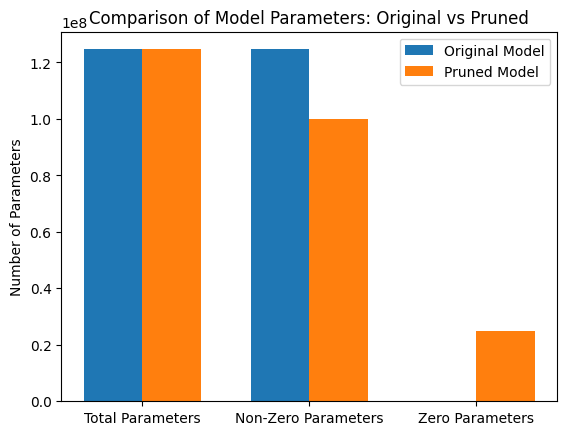

In [8]:


def get_model_parameters(model):
    """
    Get the total number of trainable parameters, non-zero parameters, and zero parameters in the model.

    :param model: The model to evaluate.
    :return: A tuple containing (total_params, non_zero_params, zero_params).
    """
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_zero_params = sum(torch.sum(p != 0).item() for p in model.parameters() if p.requires_grad)
    zero_params = total_params - non_zero_params
    return total_params, non_zero_params, zero_params

def plot_parameters_comparison(original_params, pruned_params):
    """
    Plot a comparison of total, non-zero, and zero parameters between the original and pruned models.

    :param original_params: A tuple containing (total_params, non_zero_params, zero_params) for the original model.
    :param pruned_params: A tuple containing (total_params, non_zero_params, zero_params) for the pruned model.
    """
    labels = ['Total Parameters', 'Non-Zero Parameters', 'Zero Parameters']
    original_values = [original_params[0], original_params[1], original_params[2]]
    pruned_values = [pruned_params[0], pruned_params[1], pruned_params[2]]

    x = range(len(labels))
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots()
    ax.bar(x, original_values, width, label='Original Model')
    ax.bar([p + width for p in x], pruned_values, width, label='Pruned Model')

    ax.set_ylabel('Number of Parameters')
    ax.set_title('Comparison of Model Parameters: Original vs Pruned')
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Load the original model
model_path = '/content/drive/MyDrive/trained_model'
original_model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(model_path)

# Get parameters for the original model
original_params = get_model_parameters(original_model)


# Get parameters for the pruned model
pruned_params = get_model_parameters(pruned_model)

# Plot the comparison
plot_parameters_comparison(original_params, pruned_params)


In [9]:

def print_model_parameters_by_layer(model):
    """
    Print the total number of trainable parameters and the number of non-zero parameters in each layer of the model.

    :param model: The model to evaluate.
    """
    total_params = 0
    non_zero_params = 0
    zero_params = 0

    for name, param in model.named_parameters():
        if param.requires_grad:
            layer_total = param.numel()
            layer_non_zero = torch.sum(param != 0).item()
            layer_zero = layer_total - layer_non_zero

            total_params += layer_total
            non_zero_params += layer_non_zero
            zero_params += layer_zero

            print(f"Layer: {name}")
            print(f"  Total parameters: {layer_total}")
            print(f"  Non-zero parameters: {layer_non_zero}")
            print(f"  Zero parameters: {layer_zero}")
            print(f"  Layer sparsity: {(layer_zero / layer_total) * 100:.2f}%")
            print("--------------------------------------------------")

    print("Summary for the entire model:")
    print(f"Total parameters: {total_params}")
    print(f"Non-zero parameters: {non_zero_params}")
    print(f"Zero parameters: {zero_params}")
    print(f"Model sparsity: {(zero_params / total_params) * 100:.2f}%")

# Example usage:

# Assume pruned_model is the pruned model and model_path is the path to the original model

print("Pruned Model:")
print_model_parameters_by_layer(pruned_model)
print("--------------------------------------")

# Load the original model
model_path = '/content/drive/MyDrive/trained_model'
model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(model_path)

print("Original Model:")
print_model_parameters_by_layer(model)


Pruned Model:
Layer: roberta.embeddings.word_embeddings.weight
  Total parameters: 38603520
  Non-zero parameters: 30882816
  Zero parameters: 7720704
  Layer sparsity: 20.00%
--------------------------------------------------
Layer: roberta.embeddings.position_embeddings.weight
  Total parameters: 394752
  Non-zero parameters: 315802
  Zero parameters: 78950
  Layer sparsity: 20.00%
--------------------------------------------------
Layer: roberta.embeddings.token_type_embeddings.weight
  Total parameters: 768
  Non-zero parameters: 614
  Zero parameters: 154
  Layer sparsity: 20.05%
--------------------------------------------------
Layer: roberta.embeddings.LayerNorm.weight
  Total parameters: 768
  Non-zero parameters: 768
  Zero parameters: 0
  Layer sparsity: 0.00%
--------------------------------------------------
Layer: roberta.embeddings.LayerNorm.bias
  Total parameters: 768
  Non-zero parameters: 614
  Zero parameters: 154
  Layer sparsity: 20.05%
---------------------------

In [10]:

def find_dead_neurons(model):
    """
    Find neurons that have zero weights in all their incoming connections across the layers.

    :param model: The model to evaluate.
    :return: A dictionary where keys are layer names and values are lists of indices of dead neurons.
    """
    dead_neurons = {}

    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            weight_matrix = module.weight.cpu().detach().numpy()
            dead_neuron_indices = []

            # Check each neuron (row in the weight matrix) for all-zero weights
            for i, neuron_weights in enumerate(weight_matrix):
                if not neuron_weights.any():  # If all weights are zero
                    dead_neuron_indices.append(i)

            if dead_neuron_indices:
                dead_neurons[name] = dead_neuron_indices

    return dead_neurons

def print_dead_neurons(dead_neurons):
    """
    Print the dead neurons identified in the model.

    :param dead_neurons: A dictionary of dead neurons found by find_dead_neurons.
    """
    for layer_name, neuron_indices in dead_neurons.items():
        print(f"Layer: {layer_name}")
        print(f"  Dead Neurons: {neuron_indices}")
        print(f"  Total Dead Neurons: {len(neuron_indices)}")
        print("--------------------------------------------------")



# Load the original model
model_path = '/content/drive/MyDrive/trained_model'
model = RobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(model_path)

# Find and print dead neurons in the original model
print("Original Model Dead Neurons:")
dead_neurons_original = find_dead_neurons(model)
print_dead_neurons(dead_neurons_original)

# Assuming pruned_model is the pruned model, you can also find and print its dead neurons
print("Pruned Model Dead Neurons:")
dead_neurons_pruned = find_dead_neurons(pruned_model)
print_dead_neurons(dead_neurons_pruned)


Original Model Dead Neurons:
Pruned Model Dead Neurons:
Layer: roberta.encoder.layer.0.attention.self.query
  Dead Neurons: [1, 2, 3, 4, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 28, 30, 31, 33, 35, 38, 39, 42, 43, 45, 46, 47, 48, 50, 51, 53, 56, 57, 58, 59, 61, 62, 65, 67, 68, 70, 72, 73, 74, 78, 79, 80, 81, 85, 88, 89, 91, 92, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 123, 124, 125, 126, 127, 396, 398, 405, 409, 414, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 669]
  Total Dead Neurons: 154
--------------------------------------------------
Layer: roberta.encoder.layer.0.attention.self.key
  Dead Neurons: [1, 6, 8, 12, 13, 15, 18, 19, 21

##  Student - teacher


In [ ]:

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load the pre-trained RoBERTa model as the teacher model
teacher_model = RobertaForSequenceClassification.from_pretrained('/content/drive/MyDrive/NLP_project/trained_model')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Initialize a smaller student model
student_model = RobertaForSequenceClassification.from_pretrained('distilbert/distilroberta-base', num_labels=teacher_model.config.num_labels)

teacher_model.to(device)
student_model.to(device)

# Load your datasets
# train_dataset = load_dataset(data_set, split='train')
# val_dataset = load_dataset(data_set, split='validation')

# # Tokenize the datasets
# def tokenize(batch):
#     return tokenizer(batch['text'], padding=True, truncation=True)

# train_dataset = train_dataset.map(tokenize, batched=True)
# val_dataset = val_dataset.map(tokenize, batched=True)

# Set up training arguments
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/NLP_project/distilled_model',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    evaluation_strategy='epoch',
    logging_dir='/content/drive/MyDrive/NLP_project/logs',
    logging_steps=10,
    save_steps=1000,
    save_total_limit=2,
    do_train=True,
    do_eval=True
)

# Define the knowledge distillation loss function
def distillation_loss(student_logits, teacher_logits, temperature=2.0, alpha=0.5):
    # Soft targets
    soft_targets = torch.nn.functional.softmax(teacher_logits / temperature, dim=-1)
    # Student outputs with softmax
    student_softmax = torch.nn.functional.log_softmax(student_logits / temperature, dim=-1)
    # Loss calculation
    loss = torch.nn.functional.kl_div(student_softmax, soft_targets, reduction='batchmean') * (temperature ** 2)
    return alpha * loss

# Custom Trainer for Knowledge Distillation
class DistillationTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs_student = model(**inputs)
        student_logits = outputs_student.logits

        with torch.no_grad():
            outputs_teacher = teacher_model(**inputs)
            teacher_logits = outputs_teacher.logits

        loss = distillation_loss(student_logits, teacher_logits)
        return (loss, outputs_student) if return_outputs else loss

# Instantiate the Trainer
trainer = DistillationTrainer(
    model=student_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

# Start training
trainer.train()


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilbert/distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.097100,0.021738
2,0.010600,0.023753
3,0.044800,0.017933


TrainOutput(global_step=12375, training_loss=0.03647315346413866, metrics={'train_runtime': 10116.9585, 'train_samples_per_second': 19.568, 'train_steps_per_second': 1.223, 'total_flos': 2.6223776107536384e+16, 'train_loss': 0.03647315346413866, 'epoch': 3.0})

In [ ]:

print_size_of_model(student_model)

Size (MB): 328.515929


In [ ]:
# student_model.save_pretrained('/content/drive/MyDrive/NLP_project/student_model')

In [ ]:

# Update
trainer.model = student_model

# Evaluate
pruned_results = trainer.evaluate()
print(f"Student Model - Validation Loss: {pruned_results['eval_loss']}")
print(f"Student Model - Validation Accuracy: {pruned_results['eval_accuracy'] * 100:.2f}%")
print_size_of_model(student_model)

Student Model - Validation Loss: 0.04337078332901001
Student Model - Validation Accuracy: 99.03%
Size (MB): 328.515929


In [ ]:
print('PRUNED RoBERTA PARAMETER: \n')
count_parameters(nlp.model)
print('\n RRoBERTA PARAMETER: \n')
count_parameters(model)
print('\n dislation PARAMETER: \n')
count_parameters(RobertaForSequenceClassification.from_pretrained('/content/drive/MyDrive/NLP_project/student_model'))
print('\n quantisize PARAMETER: \n')
count_parameters(quantized_model)

PRUNED RoBERTA PARAMETER: 

Total parameters: 124647170
Trainable parameters: 124647170
Non-trainable parameters: 0

 RRoBERTA PARAMETER: 

Total parameters: 124647170
Trainable parameters: 124647170
Non-trainable parameters: 0

 dislation PARAMETER: 

Total parameters: 82119938
Trainable parameters: 82119938
Non-trainable parameters: 0

 quantisize PARAMETER: 

Total parameters: 39037440
Trainable parameters: 39037440
Non-trainable parameters: 0
